<div align="center">

# <span style="color: #3498db;">CA2 - Genetic Algorithm</span>

**<span style="color:rgb(247, 169, 0);">Parsa Saeednia</span> - <span style="color:rgb(143, 95, 195);">810102460</span>**

</div>


<div style="font-family: Arial, sans-serif; line-height: 1.6;">

### 📊 Matplotlib – Data Visualization in Python  

matplotlib is a python library that is mainly used for data visualization. This library allows you to plot different type of figures including scatters and histograms. In the first part of this project you are supposed to implement a genetic algorithm. To visualize plots that are required in the project description use plotting as much as you can because it gives a great insight on what is happening during each run. It also helps you to compare your results whenevever you want to understand effect of different parameters during different runs.
For more information, check [this notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) and visit [the website](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py).

# <span style="color: #3498db;">Genetic Algorithm</span>

# Code

In [836]:
import matplotlib.pyplot as plt

In [837]:
import random
import numpy as np

In [838]:
def fourierCalculate(constantsMap: dict, xValues):
    n = len(constantsMap) // 2
    
    aCoeffs = np.array([constantsMap[f"a{i}"] for i in range(n + 1)])
    bCoeffs = np.array([constantsMap[f"b{i}"] for i in range(1, n + 1)])
    
    k = np.arange(n + 1)
    kx = np.outer(xValues, k)
    cosTerms = aCoeffs * np.cos(kx)
    
    kSin = np.arange(1, n + 1)
    kxSin = np.outer(xValues, kSin)
    sinTerms = bCoeffs * np.sin(kxSin)
    
    return (aCoeffs[0] / 2) + np.sum(cosTerms, axis=1) + np.sum(sinTerms, axis=1)

In [839]:
class Database:
    def __init__(self, populationSize_, generationsCount_, coeffsNum_, mutationRate_, coeffsRange_, mutationRange_):
        self.populationSize = populationSize_
        self.generationsCount = generationsCount_
        self.coeffsNum = coeffsNum_
        self.mutationRate = mutationRate_
        self.coeffsRange = coeffsRange_
        self.mutationRange = mutationRange_
        
    
    def getPopulationSize(self):
        return self.populationSize
        
        
    def getGenerationCount(self):
        return self.generationsCount
    
    
    def getCoeffsNum(self):
        return self.coeffsNum
        
        
    def getMutationRate(self):
        return self.mutationRate
    
    
    def getCoeffsRange(self):
        return self.coeffsRange
    
    
    def getTSamples(self):
        return self.tSamples
    
    
    def getFSamples(self):
        return self.fSamples
    
    
    def getPopulation(self):
        return self.population
    
    
    def getMutationRange(self):
        return self.mutationRange
    
    
    def getGenerationFitness(self):
        return self.generationFitness
    
    
    def setGenerationFitness(self, generationFitness_):
        self.generationFitness = generationFitness_
    
    
    def setMutationRange(self, mutationRange_):
        self.mutationRange = mutationRange_
        
        
    def setFSamples(self, fSamples_):
        self.fSamples = fSamples_
        
    
    def setTSamples(self, tSamples_):
        self.tSamples = tSamples_
        
    
    def setCoeffsRange(self, coeffsRange_):
        self.coeffsRange = coeffsRange_
        
        
    def setPopulationSize(self, populationSize_):
        self.populationSize = populationSize_
        
        
    def setGenerationCount(self, generationsCount_):
        self.generationsCount = generationsCount_
        
        
    def setCoeffsNum(self, coeffsNum_):
        self.coeffsNum = coeffsNum_
        
        
    def setMutationRate(self, mutationRate_):
        self.mutationRate = mutationRate_
        
        
    def setPopulation(self, population_):
        self.population = population_
    

In [840]:
class Species:
    def __init__(self, database: Database, genome_):
        if genome_ is None:
            self.genome = self.generateGenome(database)
        else:
            self.genome = genome_
            
        self.fourierEstimations = fourierCalculate(self.genome, database.getTSamples())

    
    def generateGenome(self, database: Database):
        genome = dict()
        coeffsRange = database.getCoeffsRange()
        genome["a0"] = random.uniform(coeffsRange[0], coeffsRange[1])
        for i in range(1, database.getCoeffsNum() // 2 + 1):
            genome[f"a{i}"] = random.uniform(coeffsRange[0], coeffsRange[1])
            genome[f"b{i}"] = random.uniform(coeffsRange[0], coeffsRange[1])
            
        return genome
            
            
    def rmseFitness(self, database: Database):
        diff = self.fourierEstimations - database.getFSamples()
        return np.sqrt(np.mean(np.square(diff)))
    
    
    def maeFitness(self, database: Database):
        true_values = database.getFSamples()
        mae = np.sum(np.abs(self.fourierEstimations - true_values))
        mae /= len(true_values)
        return mae
    
    
    def correlationFitness(self, database: Database):
        trueValues = database.getFSamples()
        predictions = self.fourierEstimations
        
        yMean = np.mean(trueValues)
        pMean = np.mean(predictions)
        
        covariance = np.sum((trueValues - yMean) * (predictions - pMean))
        yVar = np.sum(np.square(trueValues - yMean))
        pVar = np.sum(np.square(predictions - pMean))
        
        if yVar == 0 or pVar == 0:
            return 1.0
        
        r = covariance / np.sqrt(yVar * pVar)

        return 1.0 - min(1.0, abs(r))

    
    def mergeSinglePoint(self, other: "Species"):
        keys = list(self.genome.keys())
        crossoverPoint = random.randint(1, len(keys) - 1)
        
        selfValues = np.array(list(self.genome.values()))
        otherValues = np.array(list(other.genome.values()))
        
        mask = np.arange(len(keys)) < crossoverPoint
        
        firstOffspring = np.where(mask, selfValues, otherValues)
        secondOffspring = np.where(mask, otherValues, selfValues)
        
        firstOffspring = dict(zip(keys, firstOffspring))
        secondOffspring = dict(zip(keys, secondOffspring))
        
        return firstOffspring, secondOffspring

    
    
    def mergeMultiPoint(self, other: "Species", pointsCount):
        keys = np.array(list(self.genome.keys()))
        selfValues = np.array(list(self.genome.values()))
        otherValues = np.array(list(other.genome.values()))
        
        crossoverPoints = np.sort(np.random.choice(
            np.arange(1, len(keys)), 
            size=min(pointsCount, len(keys)-1), 
            replace=False
        ))
        
        mask = np.zeros(len(keys), dtype=bool)
        start = 0
        for i, point in enumerate(crossoverPoints):
            if i % 2 == 0:
                mask[start:point] = True
            start = point
        if len(crossoverPoints) % 2 == 0:
            mask[start:] = True
        
        firstOffspring = np.where(mask, selfValues, otherValues)
        secondOffspring = np.where(mask, otherValues, selfValues)
        
        return (
            dict(zip(keys, firstOffspring)),
            dict(zip(keys, secondOffspring))
        )
        
        
    def mergeUniform(self, other: "Species"):
        keys = np.array(list(self.genome.keys()))
        selfValues = np.array(list(self.genome.values()))
        otherValues = np.array(list(other.genome.values()))
        
        mask = np.random.random(len(keys)) < 0.5
        
        firstOffspring = np.where(mask, selfValues, otherValues)
        secondOffspring = np.where(mask, otherValues, selfValues)
        
        return (
            dict(zip(keys, firstOffspring)),
            dict(zip(keys, secondOffspring))
        )
    
    
    def mutate(self, database: Database):
        mutationRange = database.getMutationRange()
        coeffsRange = database.getCoeffsRange()
        keys = list(self.genome.keys())
        
        mutateMask = np.random.random(len(keys)) < database.getMutationRate()
        mutations = np.random.uniform(mutationRange[0], mutationRange[1], len(keys))
        
        values = np.array(list(self.genome.values()))
        values[mutateMask] += mutations[mutateMask]
        
        values = np.clip(values, coeffsRange[0], coeffsRange[1])
        self.genome = dict(zip(keys, values))
        
    
    def getFourierEstimation(self):
        return self.fourierEstimations
        

In [841]:
class NaturalSelection:
    def __init__(self, database_: Database, fitnessFunction_, selectionType_, mergeType_):
        self.database = database_
        self.generatePopulation()
        
        self.fitnessFunction = fitnessFunction_
        self.selectionType = selectionType_
        self.mergeType = mergeType_
        
        self.bestSpecies = self.evolve()
            
            
    def generatePopulation(self):
        species = []
        for i in range(self.database.getPopulationSize()):
            species.append(Species(self.database, None))
            
        self.database.setPopulation(species)
        
        
    def evolve(self):
        self.generationFitness = dict()
        
        for i in range(self.database.getGenerationCount()):
            population = self.database.getPopulation()
            fitnessValues = [self.fitnessFunction(species, self.database) for species in population]
            
            bestIdx = np.argmin(fitnessValues)
            bestFitness = fitnessValues[bestIdx]
            
            bestSpecies = population[bestIdx]
            self.generationFitness[i] = bestFitness
            
            newGeneration = self.crossover()
            newGeneration = self.mutation(newGeneration)
            self.database.setPopulation(newGeneration)
            
        self.database.setGenerationFitness(self.generationFitness)
        return bestSpecies
        
            
    def sampleRandom(self):
        sample = random.sample(self.database.getPopulation(), self.selectionType["size"])
        return sample
        
        
    def tournamentSelect(self):
        sample = self.sampleRandom()
        sample = sorted(sample, key=lambda s: self.fitnessFunction(s, self.database))
        return (sample[0], sample[1])
    
    
    def rankSelect(self):
        population = self.database.getPopulation()
        population = sorted(population, key=lambda s: self.fitnessFunction(s, self.database), reverse=True)
        populationSize = self.database.getPopulationSize()
        
        ranks = np.arange(1, populationSize + 1)
        probabilities = ((2 - self.selectionType["selectionPressure"]) / populationSize + 
                         (2 * ranks * (self.selectionType["selectionPressure"] - 1)) / (populationSize * (populationSize - 1)))
        probabilities /= sum(probabilities)
        
        sample = np.random.choice(population, size=2, replace=False, p=probabilities)
        return (sample[0], sample[1])
    
    
    def rouletteWheelSelect(self):
        population = self.database.getPopulation()
        fitnessValues = np.array([self.fitnessFunction(species, self.database) for species in population])

        inverted_fitness = np.max(fitnessValues) - fitnessValues
        probabilities = inverted_fitness / np.sum(inverted_fitness)

        cumulative_probs = np.cumsum(probabilities)

        sample = []
        for _ in range(2):
            random_value = np.random.rand()
            selected_index = np.where(cumulative_probs >= random_value)[0][0]
            sample.append(population[selected_index])

        return tuple(sample)

            
        
    def crossover(self):
        newGeneration = []
        for _ in range(self.database.getPopulationSize() // 2):
            parents = self.selectionType["function"](self)

            if "pointsCount" in self.mergeType:
                offspringsData = self.mergeType["function"](parents[0], parents[1], self.mergeType["pointsCount"])
            else:
                offspringsData = self.mergeType["function"](parents[0], parents[1])
            
            offsprings = [Species(self.database, offspringData) for offspringData in offspringsData]
                
            newGeneration.extend(offsprings)
            
        return newGeneration

    
    def mutation(self, newGeneration : list[Species]):
        for species in newGeneration:
            species.mutate(self.database)
        
        return newGeneration
    
    
    def getBestSpecies(self) -> Species:
        return self.bestSpecies
    

# Analysing

## Sample Functions, General Parameters And Maps

In [842]:
# These functions are given as samples to use in the algorithm
def getTargetFunction(functionName="sin_cos"):
    def sinCosFunction(t):
        """Target function: sin(2πt) + 0.5*cos(4πt)."""
        return np.sin(2 * np.pi * t) + 0.5 * np.cos(4 * np.pi * t)

    def linearFunction(t):
        """Simple linear function: y = 2t + 1."""
        return 2 * t + 1

    def quadraticFunction(t):
        """Quadratic function: y = 4t^2 - 4t + 2."""
        return 4 * (t**2) - 4 * t + 2

    def cubicFunction(t):
        """Cubic function: y = 8t^3 - 12t^2 + 6t."""
        return 8 * (t**3) - 12 * (t**2) + 6 * t

    def gaussianFunction(t):
        """Gaussian function centered at t=0.5."""
        mu = 0.5
        sigma = 0.1  # Adjust sigma to control the width of the peak
        return np.exp(-((t - mu) ** 2) / (2 * sigma**2))

    def squareWaveFunction(t):
        """Approximation of a square wave. Smoothed for better Fourier approximation."""
        return 0.5 * (np.sign(np.sin(2 * np.pi * t)) + 1)

    def sawtoothFunction(t):
        """Sawtooth wave, normalized to [0, 1]."""
        return (t * 5) % 1

    def complexFourierFunction(t):
        return (
            np.sin(2 * np.pi * t)
            + 0.3 * np.cos(4 * np.pi * t)
            + 0.2 * np.sin(6 * np.pi * t)
            + 0.1 * np.cos(8 * np.pi * t)
        )

    def polynomialFunction(t):
        return 10 * (t**5) - 20 * (t**4) + 15 * (t**3) - 4 * (t**2) + t + 0.5

    functionOptions = {
        "sin_cos": sinCosFunction,
        "linear": linearFunction,
        "quadratic": quadraticFunction,
        "cubic": cubicFunction,
        "gaussian": gaussianFunction,
        "square_wave": squareWaveFunction,
        "sawtooth": sawtoothFunction,
        "complex_fourier": complexFourierFunction,
        "polynomial": polynomialFunction,
    }

    selectedFunction = functionOptions.get(functionName.lower())
    if selectedFunction:
        return selectedFunction

In [843]:
fitnessMap = {"RootedMeanSquaredError" : Species.rmseFitness, 
              "MeanAbsoluteError" : Species.maeFitness, 
              "CorrelationFitness" : Species.correlationFitness}


selectionMap = {"TournamentSelection" : {"function" : NaturalSelection.tournamentSelect, "size" : 7}, 
                "RankingSelection" : {"function" : NaturalSelection.rankSelect, "selectionPressure" : 1.6}, 
                "RouletteWheelSelect" : {"function" : NaturalSelection.rouletteWheelSelect}}


crossoverMap = {"SinglePoint" : {"function" : Species.mergeSinglePoint}, 
                "MultiPoint" : {"function" : Species.mergeMultiPoint, "pointsCount" : 8}, 
                "Uniform" : {"function" : Species.mergeUniform}}


experimentParams = {
    "functionRange": (-np.pi, np.pi),
    "sampleCount": 100
}


baseParams = {
    "populationSize_": 100,
    "generationsCount_": 250,
    "coeffsNum_": 41,
    "mutationRate_": 0.15,
    "coeffsRange_": (-10, 10),
    "mutationRange_": (-0.1, 0.1)
}

## Testing

### Running And Comparing Functions

In [844]:
def runExperiment(databaseParams, selectionMethod, crossoverMethod, fitnessFunc):
    database = Database(**databaseParams)
    tSamples = np.linspace(experimentParams["functionRange"][0], 
                          experimentParams["functionRange"][1], 
                          experimentParams["sampleCount"])
    fSamples = getTargetFunction("sin_cos")(tSamples)
    database.setTSamples(tSamples)
    database.setFSamples(np.array(fSamples))
    
    naturalSelection = NaturalSelection(
        database,
        fitnessMap[fitnessFunc],
        selectionMap[selectionMethod],
        crossoverMap[crossoverMethod]
    )
    return naturalSelection.generationFitness


def compareParameters(baseParams, paramName, paramValues, selectionMethod, 
                     crossoverMethod, fitnessFunc, title):
    plt.figure(figsize=(10, 6))
    
    for value in paramValues:
        params = baseParams.copy()
        params[paramName] = value
        results = runExperiment(params, selectionMethod, crossoverMethod, fitnessFunc)
        generations = list(results.keys())
        fitness = list(results.values())
        plt.plot(generations, fitness, label=f"{paramName}={value}")
    
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

### Comparing Different Population Sizes

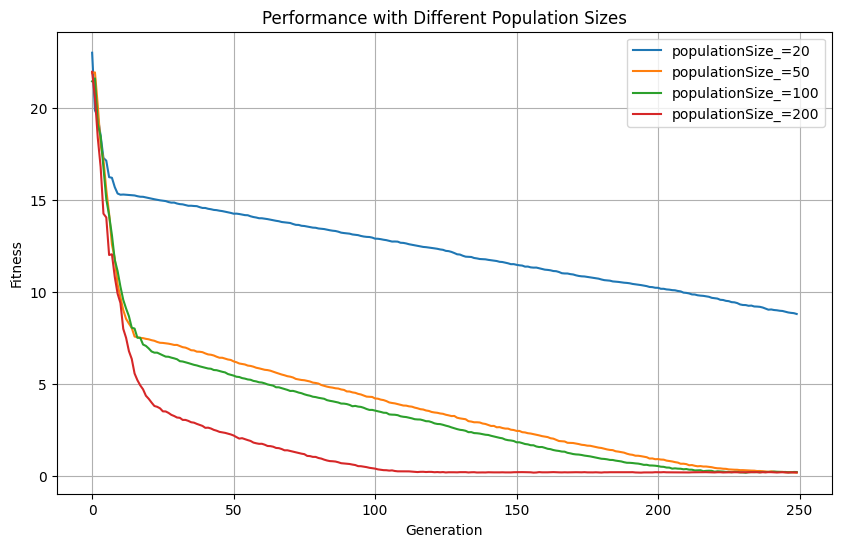

In [845]:
populationSizes = [20, 50, 100, 200]
compareParameters(
    baseParams, 
    "populationSize_", 
    populationSizes,
    "TournamentSelection",
    "Uniform",
    "RootedMeanSquaredError",
    "Performance with Different Population Sizes"
)

### Comparing Different Crossover Methods

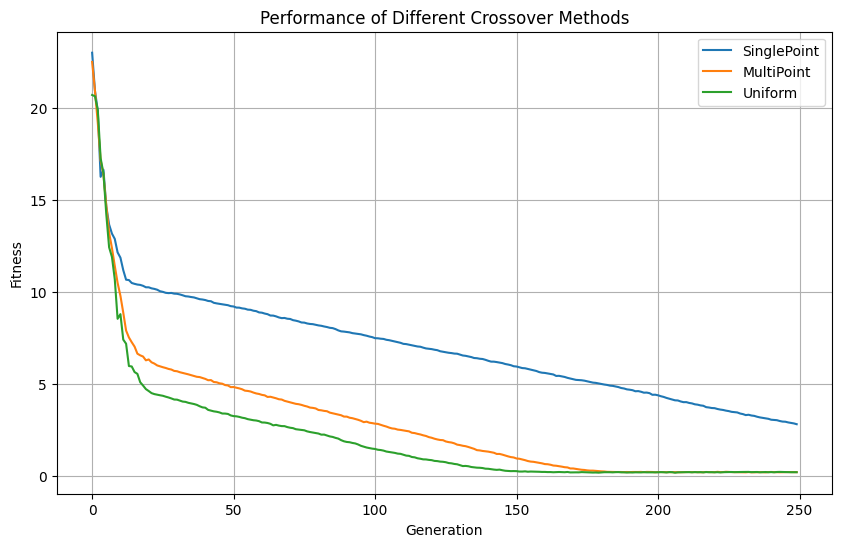

In [846]:
plt.figure(figsize=(10, 6))

for method in crossoverMap.keys():
    results = runExperiment(
        baseParams,
        'TournamentSelection',
        method,
        'RootedMeanSquaredError'
    )
    plt.plot(results.keys(), results.values(), label=method)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Performance of Different Crossover Methods')
plt.legend()
plt.grid(True)
plt.show()

### Comparing Different Selection Methods

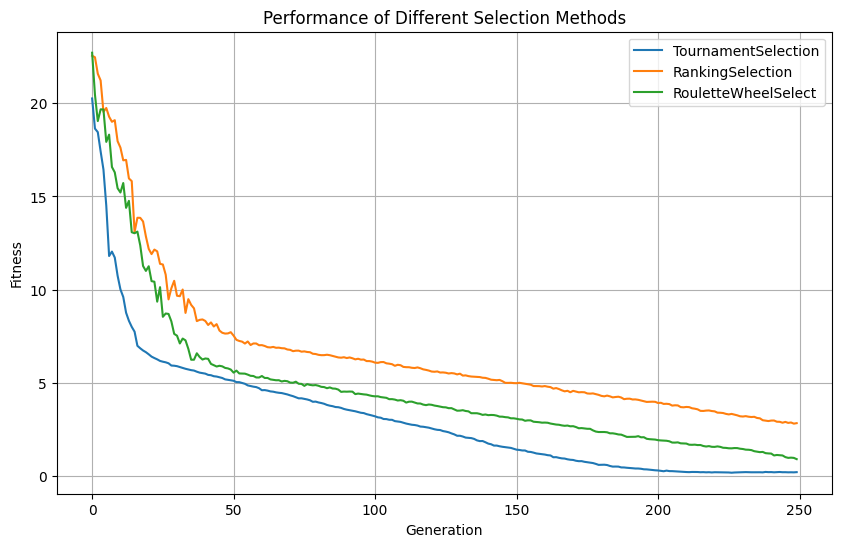

In [847]:
plt.figure(figsize=(10, 6))

for method in selectionMap.keys():
    results = runExperiment(
        baseParams,
        method,
        'Uniform',
        'RootedMeanSquaredError'
    )
    plt.plot(results.keys(), results.values(), label=method)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Performance of Different Selection Methods')
plt.legend()
plt.grid(True)
plt.show()

### Comparing Different Fitness Functions

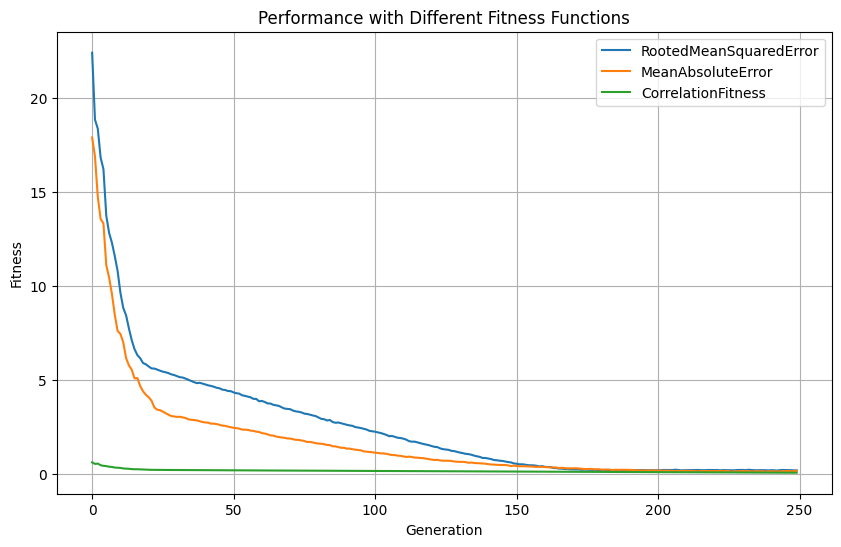

In [848]:
plt.figure(figsize=(10, 6))

for func in fitnessMap.keys():
    results = runExperiment(
        baseParams,
        'TournamentSelection',
        'Uniform',
        func
    )
    plt.plot(results.keys(), results.values(), label=func)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Performance with Different Fitness Functions')
plt.legend()
plt.grid(True)
plt.show()

### Plotting True vs Predicted Values

In [849]:
def plotActualVsPredicted(databaseParams, selectionMethod, crossoverMethod, fitnessFunc, sampleFunc):
    database = Database(**databaseParams)
    tSamples = np.linspace(experimentParams["functionRange"][0], 
                          experimentParams["functionRange"][1], 
                          experimentParams["sampleCount"])
    fSamples = getTargetFunction(sampleFunc)(tSamples)
    database.setTSamples(tSamples)
    database.setFSamples(np.array(fSamples))
    
    naturalSelection = NaturalSelection(
        database,
        fitnessMap[fitnessFunc],
        selectionMap[selectionMethod],
        crossoverMap[crossoverMethod]
    )
    
    plt.figure(figsize=(12, 6))
    plt.plot(tSamples, fSamples, label='True Function', linewidth=2)
    plt.plot(tSamples, naturalSelection.getBestSpecies().getFourierEstimation(), '--', label='Algorithm Prediction')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('True Function vs Algorithm Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

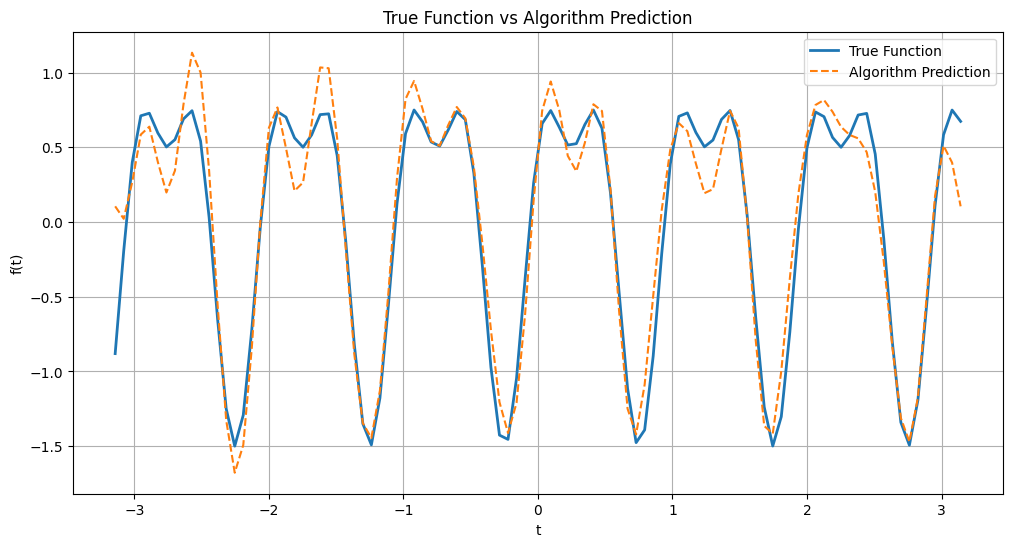

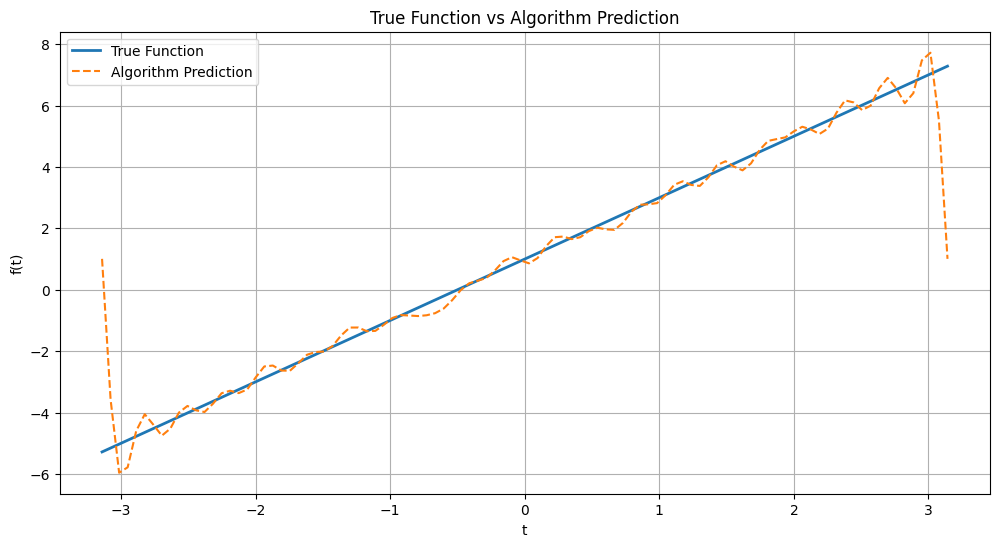

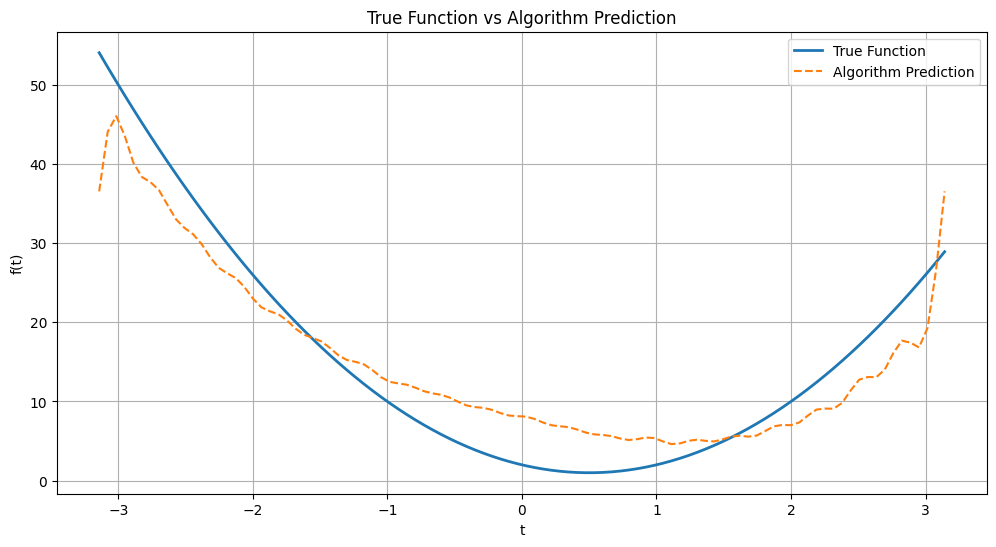

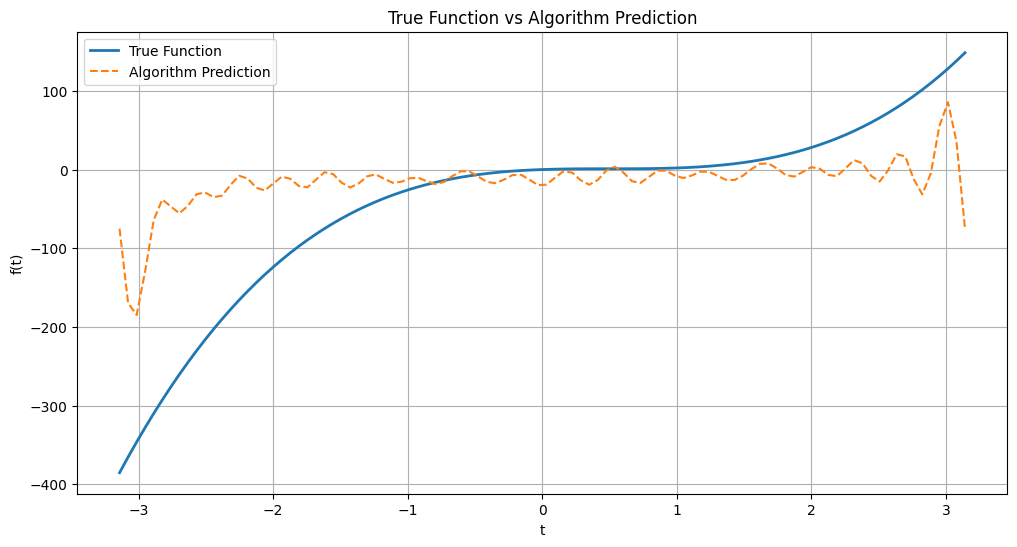

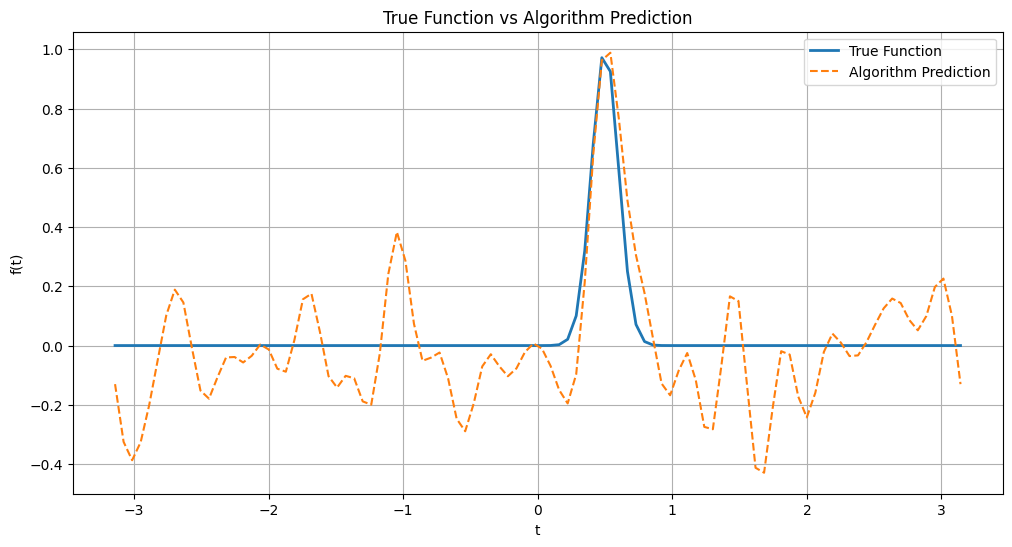

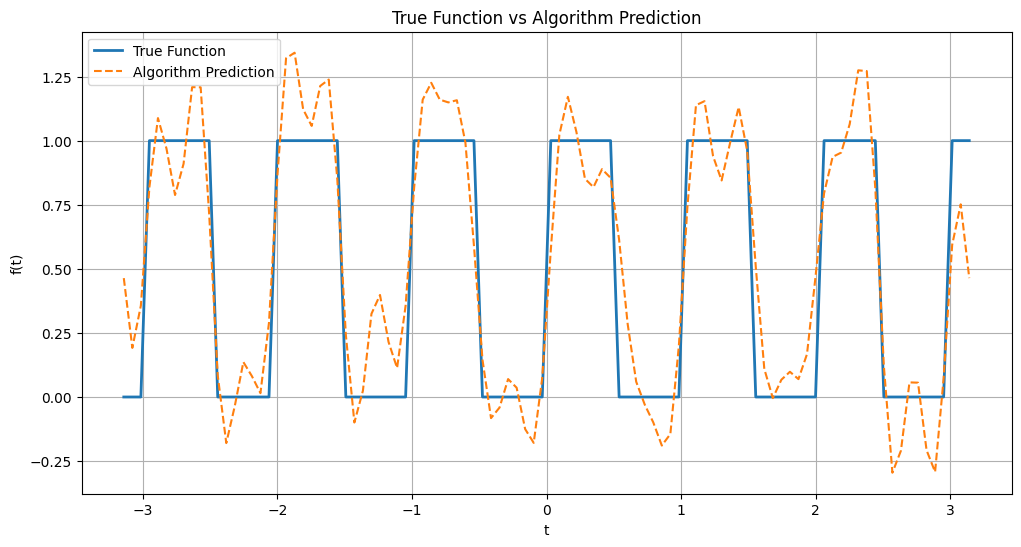

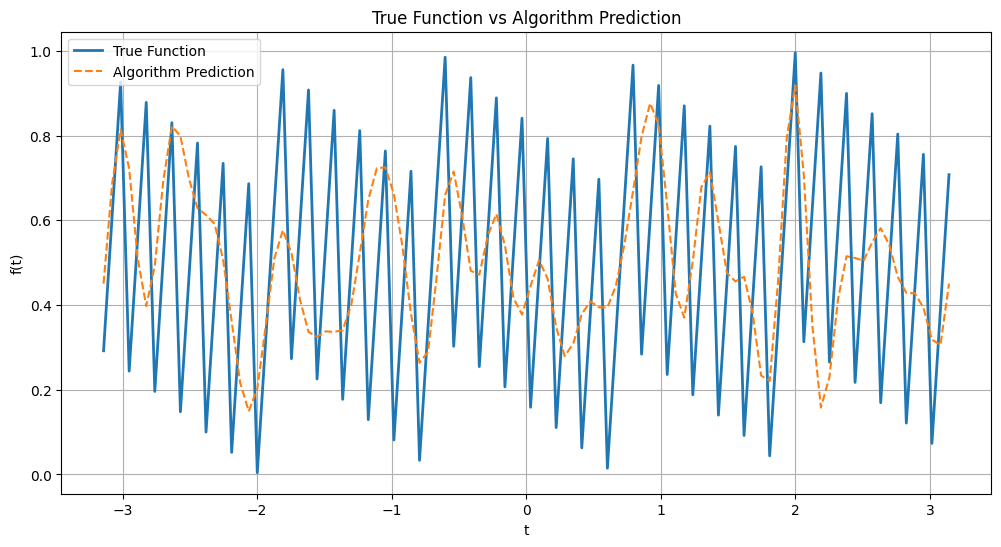

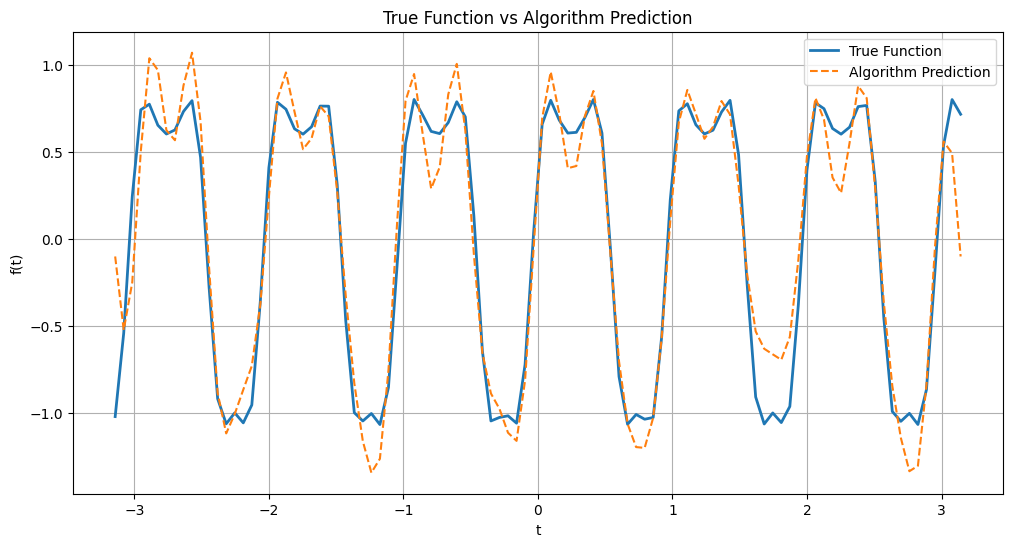

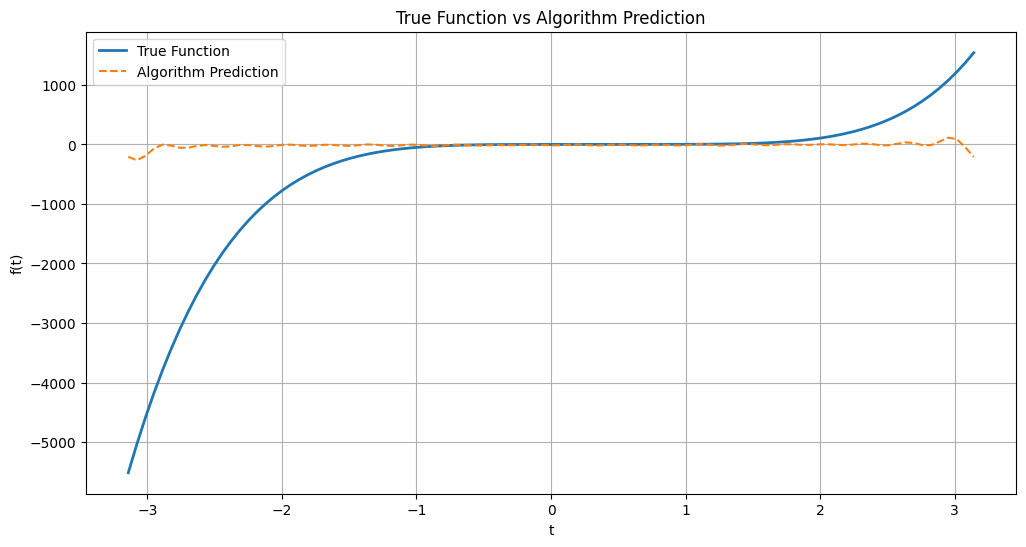

In [850]:
functions = ["sin_cos", "linear", "quadratic", 
             "cubic", "gaussian", "square_wave", 
             "sawtooth", "complex_fourier", "polynomial"]

for func in functions:
    plotActualVsPredicted(
        baseParams,
        'TournamentSelection',
        'Uniform',
        'RootedMeanSquaredError',
        func
    )

## Analysis

### Search Space Definition and Chromosome Complexity


The chromosome consists of N Fourier series coefficients for the specified function, where N is an odd integer (defaulting to 41).

Each coefficient is constrained to a range $[-A, A]$, assumed by default to be $[−10,10]$.

If we represent each coefficient as a floating-point number with M decimal places, the total number of possible states is approximately:  
$(20 \times 10^M)^N = 2^N \times 10^{N \times (M + 1)}$ states.  
  
For M equal to 3:
>$2^{41} \times 10^{164}$

### Strategies for Improving Convergence in Genetic Algorithms


### ***1. Larger Population Size***

Idea:
Use a larger initial population to improve convergence speed.

Mechanism:

> More individuals → Higher genetic diversity.

> Faster application of crossover → Quicker propagation of beneficial traits.

> Reduces stagnation risk by exploring more solutions early.

Advantages:
> Faster discovery of high-quality solutions.
> Lowers chance of premature convergence to local optima.  
  
    

### ***2. Dynamic Mutation Rate***

Idea:
Start with a high mutation rate and decay it over generations.

Why It Works:

> Early Phase: High mutation (e.g., 0.1) promotes diversity.

> Late Phase: Low mutation (e.g., 0.01) fine-tunes solutions.

Advantages:
> Balances exploration (broad search) and exploitation (precision).
> Prevents disruption of near-optimal solutions later.

### Selection Mechanisms and Selection Pressure


### **1. Tournament Selection**

In Tournament Selection, we take a random sample of our population and then sort them by their fitness in a tournament. We then choose the top 2 individuals from this group for the crossover process. This method proved to be the most efficient among the three selection methods we tested: Tournament Selection, Ranking Selection, and Roulette Wheel Selection.

**Selection Pressure Explanation**:  
The tournament size controls selection pressure:
- Small tournament (2-3 individuals): Lower pressure, maintains diversity
- Large tournament (10+ individuals): Higher pressure, faster convergence

### **2. Ranking Selection**

This method involves:
1. Ranking the entire population based on fitness
2. Mapping the ranks to selection probabilities using a linear function that incorporates selection pressure
3. Using these probabilities to select 2 individuals for crossover

**Selection Pressure (SP) Explanation**:
- SP=1.0: All individuals have equal chance
- SP=2.0: Top individual has 2× average probability
- Typical range: 1.2-2.0

### Maintaining Population Diversity Through Mutation and Fitness Scaling


### ***1. Mutation***

Mutation enhances genetic diversity in two key ways:

- ***Increasing mutation range***: Allows genomes to explore wider areas of the solution space
- ***Increasing mutation rate***: Introduces more genetic variations, creating more diverse species

This mechanism helps the algorithm escape local optima by continuously introducing new genetic material.

### ***2. Balanced Fitness Probabilities***

Traditional selection methods (like Roulette Wheel) have a diversity problem:

- They assign selection probabilities ***directly proportional to raw fitness values***
- When fitness values have high variance:
  - High-fitness individuals dominate reproduction
  - Low-fitness individuals get nearly zero selection chance
  - Population diversity collapses rapidly

***Solution***: Use balanced fitness normalization:
1. Normalize or scale fitness values to reduce extreme variances
2. Implement rank-based or tournament selection instead of pure fitness-proportionate methods
3. Apply fitness sharing to protect niche solutions

This approach maintains diversity while still favoring better solutions, enabling broader exploration of the solution space.

### Limitations of R‑Squared as a Fitness Function in Genetic Algorithms


### ***R-Squared Fitness Explanation***

***What is R-Squared?***  

R-Squared (R²), or the **coefficient of determination**, is a statistical measure that represents:
- The proportion of variance in the dependent variable (true values) that's predictable from the independent variable (predictions)
- Ranges from 0 to 1 for perfect fits, but can be negative for poor fits
- Formula:  
$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$  

The numerator represents the ***Residual Sum of Squares (RSS)***, while the denominator represents the ***Total Sum of Squares (TSS)***.  
This results in:
$R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$  

Where:
- $y_i$ are the actual values.
- $\hat{y}_i$ are the predicted values by the model.
- $\bar{y}$ is the mean of the actual values.  

If $R^2 = 1$, the model perfectly predicts the data.  
If $R^2 = 0$, the model provides no better prediction than using the mean.  
If $R^2 < 0$, the model performs worse than a random guess.  


### ***How It Works in Genetic Algorithms***
> If the dependent variable(s) vary up and down in sync with the independent variable (what you're trying to predict), you'll have a high R-squared.  

Now this method fails in cases where the fitness calculated is negative.  
A negative R-Squared value in genetic algorithms generally indicates that the model is performing worse than a naive baseline specifically, worse than simply predicting the mean of the dataset for all values.  

A negative value occurs when the Residual Sum of Squares $RSS$ is larger than the Total Sum of Squares $TSS$, meaning the model’s predictions create more error than just assuming the average of $y_i$.  

### ***Why It's Problematic in Genetic Algorithms:***

- Bad Initial Population – If the initial chromosome values are far from optimal, they may generate predictions that deviate wildly from actual data.

- Divergence from the Mean – Since a negative $R^2$ means the evolved solution is worse than simply using the mean of the data, it suggests the initial population is poorly suited for the optimization task.

- No Meaningful Fitness Direction – Genetic algorithms rely on fitness scores to guide evolution. If most of the population has negative R2R^2, the selection process becomes less effective, as it’s unclear which individuals are truly better.

- Risk of Getting Stuck - If early generations have consistently poor fitness, evolution may stagnate before finding viable solutions.

> After testing R-Squared fitness in this problem, negative fitness was observed indicating that the initial population has a poor state and therefor evolve function couldn't produce better generations based on the fitness of each species.